## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
drop = ['ID', 'Weight', 'Age', 'Height', 'Body mass index', 'Reason for absence', 'Work load Average/day ']
absent = absent.drop(columns=drop)


In [5]:
absent = absent.drop(columns=['Social drinker', 'Social smoker', 'Day of the week', 'Seasons', 'Education'])


In [6]:
absent = pd.get_dummies(absent, drop_first=True)
absent

,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Son,Pet,Absenteeism time in hours
0,7,289,36,13,97,0,2,1,4
1,7,118,13,18,97,1,1,0,0
2,7,179,51,18,97,0,0,0,2
3,7,279,5,14,97,0,2,0,4
4,7,289,36,13,97,0,2,1,2
...,...,...,...,...,...,...,...,...,...
735,7,289,36,13,93,0,2,1,8
736,7,235,11,14,93,0,1,1,4
737,0,118,14,13,95,0,1,8,0
738,0,231,35,14,95,0,2,2,0


In [7]:
# answer below:
y = absent['Absenteeism time in hours']
X = absent.drop(columns=['Absenteeism time in hours'])

from sklearn.model_selection import train_test_split, cross_val_score
#Size of the test set.
SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 592 training samples and 148 test samples


Scale the independent variables using the standard scaler

In [8]:
# answer below:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

cols = X_train.columns
scaler = StandardScaler()

prep = ColumnTransformer(transformers=[('sExpense', scaler, cols)])
X_train = prep.fit_transform(X_train)
X_test = prep.transform(X_test)



Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [9]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1000, epsilon=0.01)
svr.fit(X_train, y_train)

print("Training Score: {} \n Testing Score: {} ".format(svr.score(X_train, y_train), svr.score(X_test, y_test)))

Training Score: -0.03973544343925717 
 Testing Score: -0.017707912467042508 


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
result = GridSearchCV(svr, parameters)
result.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1000, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.01, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
# answer below:
print('best number of estimator: ',result.best_estimator_)
print('best score: ',result.best_score_)


best number of estimator:  SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
best score:  0.010783044790286755


In [16]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=10, epsilon=0.01)
svr.fit(X_train, y_train)

pred_train = svr.predict(X_train)
pred_test = svr.predict(X_test)

print("Training Score: {} \n Testing Score: {} ".format(svr.score(X_train, y_train), svr.score(X_test, y_test)))

Training Score: 0.031941417466299304 
 Testing Score: 0.0039107003780504135 


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [17]:
errs = pd.DataFrame({'prediction': pred_test, 'actual': y_test})
errs['err'] = pred_test - y_test
errs['err_size'] = abs(pred_test - y_test)
errs['isErr'] = np.where(errs['err_size'] > 0, 1, 0)
errs.head()

,prediction,actual,err,err_size,isErr
577,4.330797,3,1.330797,1.330797,1
369,1.877602,2,-0.122398,0.122398,1
350,3.990030,2,1.990030,1.990030,1
107,8.009956,3,5.009956,5.009956,1
120,2.010464,1,1.010464,1.010464,1


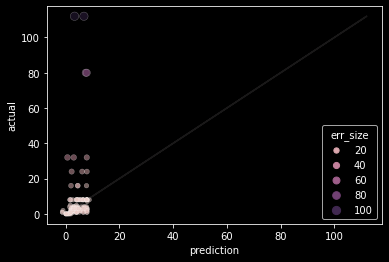

In [20]:
#Perfection!
import seaborn as sns
#Figure set up for dark theme:
plt.style.use(['dark_background'])
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

That's odd. It looks like some outliers mad it's way into my dataset. Look at that. It's all BRIGHT and Beautiful right around and between 0 and 20 and then it shot way up there giving me a prediction as big as 100. 

What did I do to deserve that? Is this due to outliers. It looks like I don't have THAT many extra large errors. but the prediction was 20 and I thought it might be well over 100. Granted, error size is the absolute valu - I am plotting agains my actual numbers. 

Hrm. 

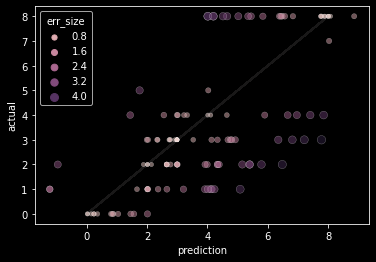

In [28]:

limit_errs = errs[errs['err_size'] < 5]

#Figure set up for dark theme:
plt.style.use(['dark_background'])
plt.plot(limit_errs['actual'], limit_errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=limit_errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

Now the score makes sense. I got a lot of erros. I think I predicted about three of them correctly.

I think I would prefer my KNN model to this one and that would be how I would want to proceed (instead of doing further tweaking).

I need a review booklet or something because in the midst of learning SVC I forgot about what all those scores means. Is there a cheat sheet? 

[This is not it.](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

Like something that points to all the labels in a classification report and says what they mean. I know if I think hard enough it'll come back to me. I should make one. 